**Descenso de gradiente**
-
---

In [1]:
import numpy as np
import sympy as sp
from matplotlib import cm
import matplotlib.pyplot as plt

In [57]:
x, y = sp.symbols('x y')

In [103]:
class f():
    def __init__(self, string):
        self.string = string
        x, y = sp.symbols('x y')
        self.expr = eval(string)
        self.nabla = sp.diff(self.expr, x) + sp.diff(self.expr, y)
    def func(self, x, y):
        return eval(self.string)
    
f1 = f("x**2+y**2")
f1.expr

x**2 + y**2

#### **Gráfica 3D de $f1(x,y)$**

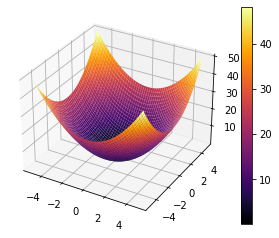

In [31]:
### Variable: Resolucion
res = 1000
### Variables: x, y, z
x1 = np.linspace(-5,5,num=res)
y1 = np.linspace(-5,5,num=res)
### Variables: XX, YY -> Generar una matriz coordinada entre x y y
XX1, YY1 = np.meshgrid(x1,y1)
### Variable: z -> Aplicando la funcion en z (usar los valores asignados por el método np.meshgrid)
z1 = f1.func(XX1,YY1)
### Gráfico
fig1, ax1 = plt.subplots(subplot_kw={'projection':'3d'})
surf = ax1.plot_surface(XX1,YY1,z1, cmap=cm.inferno)
fig1.colorbar(surf)
plt.show()

#### **Mapa de niveles de $f1(x,y)$**

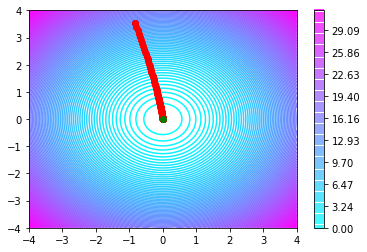

In [106]:
### Variable: Resolucion
res = 100
### Variables: x, y, z
x2 = np.linspace(-4,4,num=res)
y2 = np.linspace(-4,4,num=res)
### Variables: XX, YY -> Generar una matriz coordinada entre x y y
XX2, YY2 = np.meshgrid(x2,y2)
### Variable: z -> Aplicando la funcion en z (usar los valores asignados por el método np.meshgrid)
z2 = f1.func(XX2, YY2)
fig2, ax2 = plt.subplots()
level_map2 = np.linspace(np.min(z2),np.max(z2), num=res)
color_map2 = ax2.contour(x2,y2,z2, levels=level_map2, cmap=cm.cool)
fig2.colorbar(color_map2)

def derivate(_p,p):
      return  (f1.func(_p[0],_p[1]) - f1.func(p[0],p[1])) / (2*h)**1/2

p = np.random.rand(2) * 8 - 4 # generar dos valores aleatorios

plt.plot(p[0],p[1],'o', c='b')

lr = 0.01
h = 0.01

grad = np.zeros(2)

for i in range(10000):
  _p = np.copy(p)
  for idx, val in enumerate(p): 
    _p[idx] = _p[idx] + h
    grad[idx] = derivate(_p,p) 
  p = p - lr * grad
  if(i % 10 == 0):
    plt.plot(p[0],p[1],'o', c='r')

plt.plot(p[0],p[1],'o', c='g')
plt.show()

In [105]:
p

array([-0.005, -0.005])

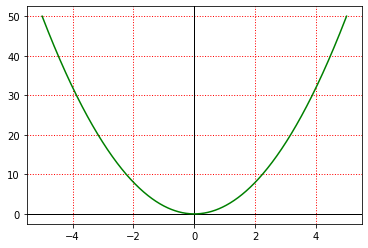

In [34]:
### Grafica x1 vs z1
fig, ax = plt.subplots()
ax.grid(color='r', linestyle='dotted', linewidth='1')
ax.axhline(y=0, color='black', linewidth='1')
ax.axvline(x=0, color='black', linewidth='1')
ax.plot(x1, f1.func(x1,y1), color='g')
plt.show()

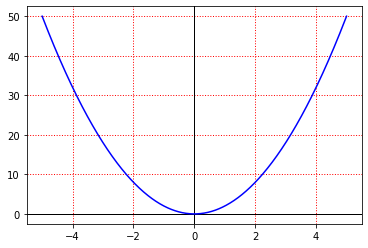

In [41]:
### Grafica y1 vs z1
fig, ax = plt.subplots()
ax.grid(color='r', linestyle='dotted', linewidth='1')
ax.axhline(y=0, color='black', linewidth='1')
ax.axvline(x=0, color='black', linewidth='1')
ax.plot(y1, f1.func(x1,y1), color='b')
plt.show()